In [1]:
import pandas as pd
import gzip
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# import nltk
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import spacy
import pyLDAvis #python library for interactive topic model visualization
# import pyLDAvis.gensim
import matplotlib.pyplot as plt

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)


import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [3]:
import os
os.getcwd()

'C:\\Users\\JiatingChen\\Documents\\chewy-seo'

In [4]:
df = getDF('./reviews_Pet_Supplies_5.json.gz') #1,235,316
metadata_df = getDF('./meta_Pet_Supplies.json.gz')

In [5]:
merged_df = pd.merge(df, metadata_df, on = 'asin', how = 'left')
merged_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,related,title,price,salesRank,imUrl,brand,categories,description
0,A14CK12J7C7JRK,1223000893,Consumer in NorCal,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3.0,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011","{'also_bought': ['B000G1KNPK', 'B00BYHJ6UI', '...","Cat Sitter DVD Trilogy - Vol 1, Vol 2 and Vol 3",29.5,{'Pet Supplies': 39514},http://ecx.images-amazon.com/images/I/41yr4bsw...,NaN,"[[Pet Supplies, Cats, Toys]]",This combo pack provides you with all 3 Cat Si...
1,A39QHP5WLON5HV,1223000893,Melodee Placial,"[0, 0]",There are usually one or more of my cats watch...,5.0,Entertaining for my cats,1379116800,"09 14, 2013","{'also_bought': ['B000G1KNPK', 'B00BYHJ6UI', '...","Cat Sitter DVD Trilogy - Vol 1, Vol 2 and Vol 3",29.5,{'Pet Supplies': 39514},http://ecx.images-amazon.com/images/I/41yr4bsw...,NaN,"[[Pet Supplies, Cats, Toys]]",This combo pack provides you with all 3 Cat Si...
2,A2CR37UY3VR7BN,1223000893,Michelle Ashbery,"[0, 0]",I bought the triliogy and have tested out all ...,4.0,Entertaining,1355875200,"12 19, 2012","{'also_bought': ['B000G1KNPK', 'B00BYHJ6UI', '...","Cat Sitter DVD Trilogy - Vol 1, Vol 2 and Vol 3",29.5,{'Pet Supplies': 39514},http://ecx.images-amazon.com/images/I/41yr4bsw...,NaN,"[[Pet Supplies, Cats, Toys]]",This combo pack provides you with all 3 Cat Si...
3,A2A4COGL9VW2HY,1223000893,Michelle P,"[2, 2]",My female kitty could care less about these vi...,4.0,Happy to have them,1305158400,"05 12, 2011","{'also_bought': ['B000G1KNPK', 'B00BYHJ6UI', '...","Cat Sitter DVD Trilogy - Vol 1, Vol 2 and Vol 3",29.5,{'Pet Supplies': 39514},http://ecx.images-amazon.com/images/I/41yr4bsw...,NaN,"[[Pet Supplies, Cats, Toys]]",This combo pack provides you with all 3 Cat Si...
4,A2UBQA85NIGLHA,1223000893,"Tim Isenhour ""Timbo""","[6, 7]","If I had gotten just volume two, I would have ...",3.0,You really only need vol 2,1330905600,"03 5, 2012","{'also_bought': ['B000G1KNPK', 'B00BYHJ6UI', '...","Cat Sitter DVD Trilogy - Vol 1, Vol 2 and Vol 3",29.5,{'Pet Supplies': 39514},http://ecx.images-amazon.com/images/I/41yr4bsw...,NaN,"[[Pet Supplies, Cats, Toys]]",This combo pack provides you with all 3 Cat Si...


In [6]:
cate_leng = []
for i, item in merged_df.iterrows():
    cate_leng.append(len(item['categories'][0]))

In [7]:
merged_df['category_len'] = cate_leng

In [8]:
merged_df['category_len'].max(), merged_df['category_len'].min()

(5, 1)

In [10]:
merged_df['category_1'] = ''
merged_df['category_2'] = ''
merged_df['category_3'] = ''
merged_df['category_4'] = ''
merged_df['category_5'] = ''

for i, item in merged_df.iterrows():
    if item['category_len'] >= 1:
        merged_df['category_1'].iloc[i] = item['categories'][0][0]
    if item['category_len'] >= 2:
        merged_df['category_2'].iloc[i] = item['categories'][0][1]
    if item['category_len'] >= 3:
        merged_df['category_3'].iloc[i] = item['categories'][0][2]
    if item['category_len'] >= 4:
        merged_df['category_4'].iloc[i] = item['categories'][0][3]
    if item['category_len'] >= 5:
        merged_df['category_5'].iloc[i] = item['categories'][0][4]

In [41]:
# merged_df.to_csv('pet_category.csv')

In [12]:
merged_df = pd.read_csv('./pet_category.csv', index_col = False)

In [13]:
merged_df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,...,imUrl,brand,categories,description,category_len,category_1,category_2,category_3,category_4,category_5
0,0,A14CK12J7C7JRK,1223000893,Consumer in NorCal,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3.0,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011",...,http://ecx.images-amazon.com/images/I/41yr4bsw...,NaN,"[['Pet Supplies', 'Cats', 'Toys']]",This combo pack provides you with all 3 Cat Si...,3,Pet Supplies,Cats,Toys,NaN,NaN
1,1,A39QHP5WLON5HV,1223000893,Melodee Placial,"[0, 0]",There are usually one or more of my cats watch...,5.0,Entertaining for my cats,1379116800,"09 14, 2013",...,http://ecx.images-amazon.com/images/I/41yr4bsw...,NaN,"[['Pet Supplies', 'Cats', 'Toys']]",This combo pack provides you with all 3 Cat Si...,3,Pet Supplies,Cats,Toys,NaN,NaN
2,2,A2CR37UY3VR7BN,1223000893,Michelle Ashbery,"[0, 0]",I bought the triliogy and have tested out all ...,4.0,Entertaining,1355875200,"12 19, 2012",...,http://ecx.images-amazon.com/images/I/41yr4bsw...,NaN,"[['Pet Supplies', 'Cats', 'Toys']]",This combo pack provides you with all 3 Cat Si...,3,Pet Supplies,Cats,Toys,NaN,NaN
3,3,A2A4COGL9VW2HY,1223000893,Michelle P,"[2, 2]",My female kitty could care less about these vi...,4.0,Happy to have them,1305158400,"05 12, 2011",...,http://ecx.images-amazon.com/images/I/41yr4bsw...,NaN,"[['Pet Supplies', 'Cats', 'Toys']]",This combo pack provides you with all 3 Cat Si...,3,Pet Supplies,Cats,Toys,NaN,NaN
4,4,A2UBQA85NIGLHA,1223000893,"Tim Isenhour ""Timbo""","[6, 7]","If I had gotten just volume two, I would have ...",3.0,You really only need vol 2,1330905600,"03 5, 2012",...,http://ecx.images-amazon.com/images/I/41yr4bsw...,NaN,"[['Pet Supplies', 'Cats', 'Toys']]",This combo pack provides you with all 3 Cat Si...,3,Pet Supplies,Cats,Toys,NaN,NaN


In [14]:
merged_df['category_1'].nunique()

1

In [29]:
merged_df.shape

(157836, 24)

In [32]:
sum(merged_df['category_1'].isnull()) 

0

In [41]:
merged_df.loc[merged_df['category_2'].isnull()].shape #1440

(1440, 24)

In [28]:
merged_df['category_2'].describe()

count     156396
unique        18
top         Dogs
freq       95755
Name: category_2, dtype: object

In [62]:
merged_df['category_2'].value_counts()

Dogs                                              95755
Cats                                              34149
Fish & Aquatic Pets                               10459
Pet Behavior Center                                4484
Small Animals                                      3204
Buy $25 Save $5 on Nylabone                        2517
Birds                                              1588
Pet Supplies: International Shipping Available     1258
Hagen                                               841
Reptiles & Amphibians                               787
Bunny Rabbit Central                                766
Horses                                              338
Buy $25 Save $5 on Kaytee                           189
$15 Off $75 on Midwest Beds                          22
Tetra Pond                                           16
Pets Best-Selling Halloween Costumes                 11
$5 Off $25 Plush Puppies Holiday Toys                 6
Flea & Tick Center                              

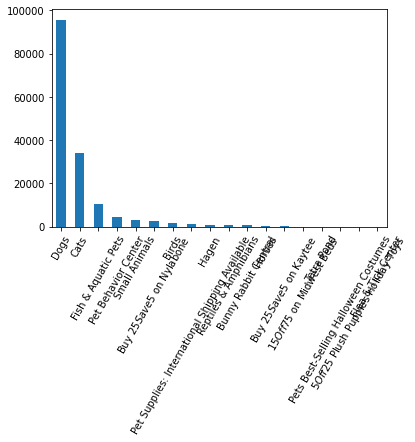

In [21]:
plt = merged_df['category_2'].value_counts().plot(kind='bar', rot=60)

In [57]:
merged_df.loc[merged_df.category_2 == 'Dogs', 'category_3'].value_counts()

Toys                            18997
Treats                          14763
Health Supplies                 12368
Collars, Harnesses & Leashes     8205
Grooming                         7964
Food                             7865
Feeding & Watering Supplies      7160
Litter & Housebreaking           5135
Carriers & Travel Products       3347
Beds & Furniture                 2557
Training & Behavior Aids         2426
Apparel & Accessories            2202
Houses, Kennels & Pens           1868
Doors, Gates & Ramps              872
Memorials                          26
Name: category_3, dtype: int64

In [71]:
merged_df.loc[(merged_df.category_2 == 'Dogs') & (merged_df.category_3 == 'Toys'), 'category_4'].value_counts()

Squeak Toys     7220
Chew Toys       5459
Balls           4454
Ropes            813
Flying Discs     425
Laser Toys        36
Name: category_4, dtype: int64

In [72]:
merged_df.loc[(merged_df.category_2 == 'Dogs') & (merged_df.category_3 == 'Treats'), 'category_4'].value_counts()

Cookies, Biscuits & Snacks    10843
Rawhide                        1660
Jerky                          1164
Bones                           866
Animal Ears                     101
Hooves                           44
Name: category_4, dtype: int64

In [73]:
merged_df.loc[(merged_df.category_2 == 'Dogs') & (merged_df.category_3 == 'Health Supplies'), 'category_4'].value_counts()

Supplements & Vitamins       5097
Flea, Lice & Tick Control    2183
Dental Care                  1982
Ear Care                      768
Relaxants                     597
Eye Care                      528
Wormers                       287
Digestive Remedies            281
Recovery Collars & Cones      247
Itch Remedies                 207
Milk Replacers                 13
Thermometers                   13
Name: category_4, dtype: int64

In [60]:
merged_df.loc[merged_df.category_2 == 'Fish & Aquatic Pets', 'category_3'].value_counts()

Pumps & Filters           4216
Food                      1051
Cleaners                  1020
Water Treatments           999
Aquariums & Fish Bowls     930
Test Kits                  613
Aquarium Heaters           549
Aquarium Lights            470
Health Supplies            279
Aquarium Substrate         161
Aquarium Hoods              89
Hydrometers                 47
Automatic Feeders           15
Breeding Tanks               5
Thermometers                 5
Name: category_3, dtype: int64

In [61]:
merged_df.loc[merged_df.category_2 == 'Small Animals', 'category_3'].value_counts()

Houses & Habitats               1154
Feeding & Watering Supplies      758
Toys                             389
Grooming                         268
Food                             197
Health Supplies                  174
Treats                           114
Carriers                          70
Exercise Wheels                   51
Odor & Stain Removers             23
Collars, Harnesses & Leashes       6
Name: category_3, dtype: int64

In [75]:
merged_df.loc[merged_df.category_2 == 'Birds', 'category_3'].value_counts()

Toys                           564
Cages & Accessories            425
Food                           279
Feeding & Watering Supplies    198
Treats                         107
Health Supplies                 15
Name: category_3, dtype: int64

In [76]:
merged_df.loc[merged_df.category_2 == 'Hagen', 'category_3'].value_counts() #? need to recategorize

All Aquatic & Pond       285
Heaters                  154
Cat Toys                 104
All Reptile               66
Bird Treats               49
Incandescent Lighting     40
Fluorescent Lighting      24
Small Animal Housing      22
Cat Grooming              19
Terrariums/Stands         17
Dog Toys                  17
Fish Food                 12
Small Animal Toys         11
Nutrafin                   6
Bird Food                  5
Reptile Substrates         5
Reptile Heating            5
Name: category_3, dtype: int64

In [78]:
merged_df.loc[merged_df.category_2 == 'Pet Behavior Center', 'category_3'].value_counts() 

Potty Training           3132
Pet Proofing              460
Dog Training              448
Fencing & Containment     321
Barking Control           123
Name: category_3, dtype: int64

In [81]:
merged_df.loc[merged_df.category_2 == 'Reptiles & Amphibians', 'category_3'].value_counts() #? need to recategorize

Food                                   183
Habitat Lighting                       155
Terrarium Heat Lamps & Mats            109
Terrarium Covers                       101
Terrarium Bedding, Sand & Substrate     91
Health Supplies                         59
Thermometers                            35
Terrarium Bowls                         32
Reptile Houses                          14
Hygrometers                              8
Name: category_3, dtype: int64

In [82]:
merged_df.loc[merged_df.category_2 == 'Bunny Rabbit Central', 'category_3'].value_counts() #? need to recategorize

Food                 352
Toys                 173
Treats               132
Rabbit Hutches        97
Houses & Habitats      6
Grooming               6
Name: category_3, dtype: int64

In [83]:
merged_df.loc[merged_df.category_2 == 'Horses', 'category_3'].value_counts() 

Health Supplies                161
Stable Supplies                106
Grooming & Bathing Supplies     71
Name: category_3, dtype: int64

In [84]:
merged_df.loc[merged_df.category_2 == 'Buy $25 Save $5 on Kaytee', 'category_3'].value_counts() #a brand

Food    189
Name: category_3, dtype: int64

In [88]:
merged_df.loc[merged_df.category_2 == 'Pet Supplies: International Shipping Available', 'category_3'].value_counts() #? need to recategorize

Series([], Name: category_3, dtype: int64)

In [90]:
target_cate_1 = ['Dogs', 'Cats', 'Fish & Aquatic Pets', 'Small Animals']
nex_cate_df = pd.DataFrame()
for target in target_cate_1: 
    tmp_df = merged_df.where(merged_df['category_2'] == target).dropna(axis=0, thresh=10)
    if len(nex_cate_df) == 0:
        nex_cate_df = tmp_df
    else:
        nex_cate_df = pd.concat([nex_cate_df, tmp_df])

In [91]:
nex_cate_df.shape

(143567, 24)

<AxesSubplot:>

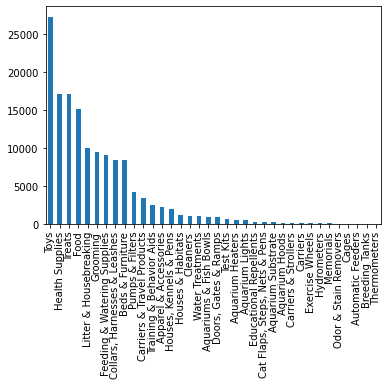

In [96]:
nex_cate_df['category_3'].value_counts().plot(kind='bar')

In [103]:
#merged_df.loc[(merged_df.category_2 == 'Dogs') | (merged_df.category_2 == 'Cats')].reset_index(drop = True).to_csv('dogs_cats_data.csv', index = False)